In [343]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [345]:
df = pd.read_excel('Job Application.xlsx')

In [347]:
df.head()

,Timestamp,Name,Email,Age,Gender,Phone number,College/University,Degree Program,Year of Study,Technical Skills,Soft Skills,Preferred Job roles,Preferred Job Types,Preferred Locations,Preferred Industry Domains
0,2024-09-05 23:38:29.209,Ayushi Chahar,ayushichaharv.276@gmail.com,22,Female,63962 54862,Jayoti vidyapeeth women's university,MCA,2,Computer programming languages,Communication,Data Analyst,"Full-Time, Internship",Noida,Finance
1,2024-09-06 08:53:04.549,Parul Rajput,missparulraj@gmail.com,23,Female,8859753995,Jayoti Vidyapeeth Women's University,B.Tech,3,Computer programming languages,I am passionate and hardworking person and als...,"Software developer, Data Analyst","Full-Time, Part-Time, Internship",Jaipur,Technology
2,2024-09-06 20:43:20.715,Riya Chaudhary,riyachaudhary292000@gmail.com,19,Female,8449522747,Jayoti Vidyapeeth Women’s University Jaipur,MBA,1,Computer programming languages,Work with finesse in pressure,Data Analyst,Part-Time,"Jaipur, delhi",Technology
3,2024-09-06 01:14:28.000,Subhasis Das,subhasisd2002@gmail.com,21,Male,8597744664,"Manipal (Online) University, Jaipur",BBA,2,Human Resource Management,"Problem Solving, Critical Thinking, Time Manag...",Data Analyst,"Full-Time, Part-Time, Internship","Bangalore, Hyderabad, Goa",Human Resource
4,2024-09-06 09:29:09.000,Vaibhav hawaldar,vaibhavhawaldar199@gmail.com,20,Male,07666638947,Pune University,BCA science,2,Data analytics,"Power bi , pivot table, data cleaning, data vi...",Data Analyst,Full-Time,"Pune, banglore",Technology


## Data Preprocessing

In [350]:
df.describe()  #gives the summary about the dataset in detailed form

,Timestamp,Age,Year of Study
count,91,91.000000,91.000000
mean,2024-10-18 17:25:30.670956544,21.153846,2.164835
min,2024-09-05 23:38:29.209000,13.000000,1.000000
25%,2024-09-26 07:55:42,20.000000,2.000000
50%,2024-10-18 19:55:42,21.000000,2.000000
75%,2024-11-10 07:55:42,22.000000,2.000000
max,2024-12-02 19:55:42,25.000000,4.000000
std,NaN,1.873340,0.687406


In [352]:
df.info()#gives the information like datatypes and null count for every columns and rows in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Timestamp                   91 non-null     datetime64[ns]
 1   Name                        91 non-null     object        
 2   Email                       91 non-null     object        
 3   Age                         91 non-null     int64         
 4   Gender                      91 non-null     object        
 5   Phone number                91 non-null     object        
 6   College/University          91 non-null     object        
 7   Degree Program              91 non-null     object        
 8   Year of Study               91 non-null     int64         
 9   Technical Skills            91 non-null     object        
 10  Soft Skills                 91 non-null     object        
 11  Preferred Job roles         91 non-null     object        
 

In [354]:
print(df.isnull().sum())

Timestamp                     0
Name                          0
Email                         0
Age                           0
Gender                        0
Phone number                  0
College/University            0
Degree Program                0
Year of Study                 0
Technical Skills              0
Soft Skills                   0
Preferred Job roles           0
Preferred Job Types           0
Preferred Locations           0
Preferred Industry Domains    0
dtype: int64


In [356]:
df.shape  #shape of dataframe

(91, 15)

### Hypothesis 1: There will be a higher concentration of students in their final years seeking full-time positions compared to those in earlier years.

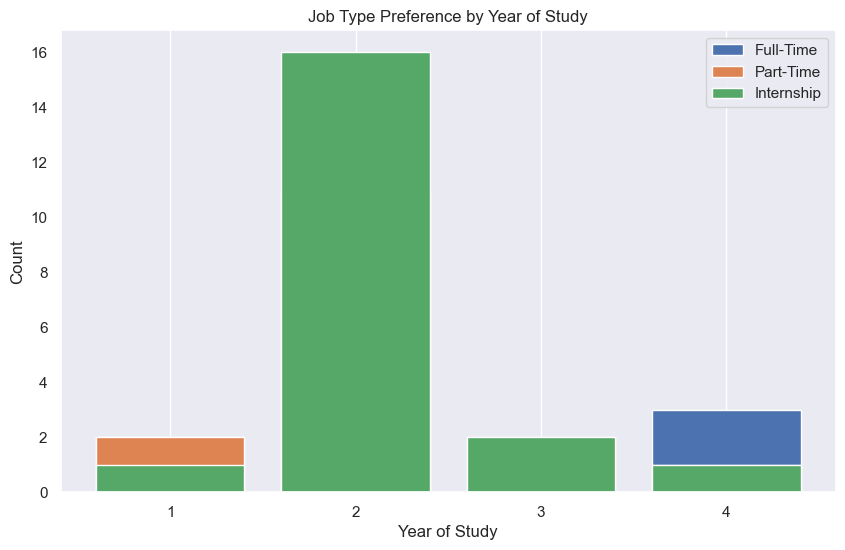

In [360]:


# Count the occurrences of each job type by year of study
job_type_counts = df.groupby('Year of Study')['Preferred Job Types'].value_counts().unstack(fill_value=0)

# Extract data for the bar chart
years = job_type_counts.index.to_numpy()
full_time_counts = job_type_counts["Full-Time"].to_numpy()
part_time_counts = job_type_counts["Part-Time"].to_numpy()
internship_counts = job_type_counts["Internship"].to_numpy()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(years, full_time_counts, label='Full-Time')
plt.bar(years, part_time_counts, label='Part-Time')
plt.bar(years, internship_counts, label='Internship')
plt.xlabel('Year of Study')
plt.ylabel('Count')
plt.title('Job Type Preference by Year of Study')
plt.xticks(years)
plt.legend()
plt.grid(axis='y')
plt.show()

## Conclusion: 
### The hypothesis was partially supported. While there was a general trend towards more students seeking full-time positions in later years, there was still a significant number of students in all years interested in part-time and internship opportunities.

### Hypothesis 2: Technical skills will be the most commonly listed skill set by students.

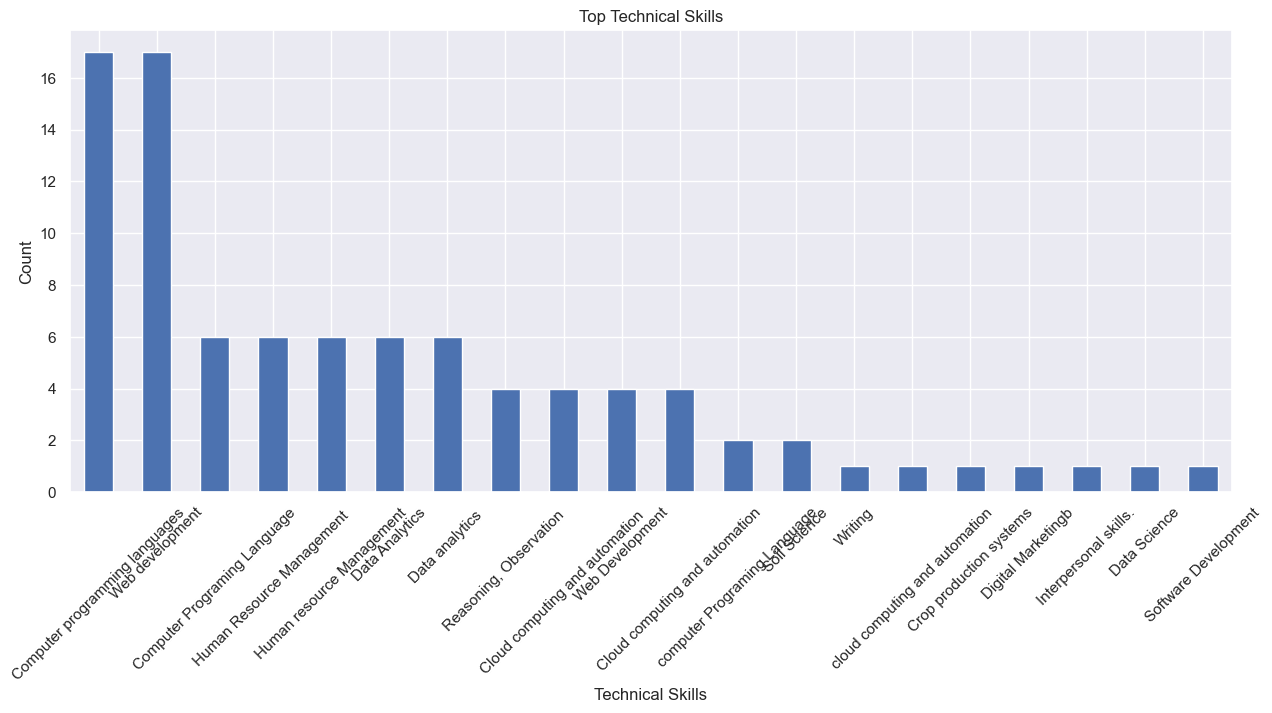

In [365]:

# Count the occurrences of each technical skill
skill_counts = df["Technical Skills"].value_counts()

# Create the bar chart
plt.figure(figsize=(15, 6))
skill_counts.plot(kind='bar')
plt.xlabel("Technical Skills")
plt.ylabel("Count")
plt.title("Top Technical Skills")
plt.xticks(rotation=45)
plt.show()

## Conclusion: 
### The hypothesis was supported. "Computer programming languages" was indeed the most common technical skill listed by students, indicating its importance in various job roles.

### Hypothesis 3: Technology will be the most preferred industry domain among students with computer science backgrounds.

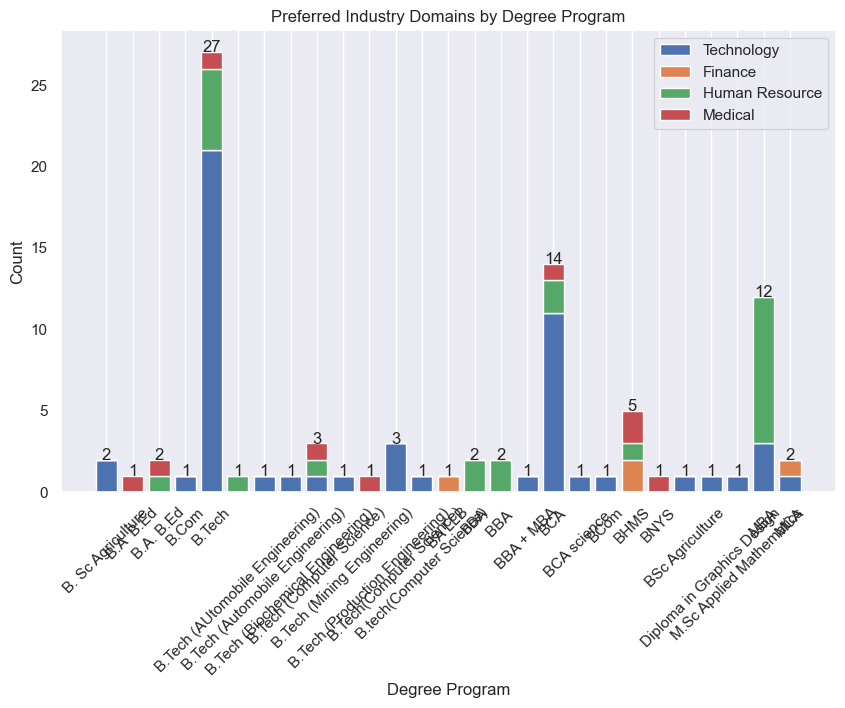

In [369]:

# Count the occurrences of each industry domain by degree program
industry_counts = df.groupby('Degree Program')['Preferred Industry Domains'].value_counts().unstack(fill_value=0)

# Extract data for the stacked bar chart
degree_programs = industry_counts.index.to_numpy()
technology_counts = industry_counts["Technology"].to_numpy()
finance_counts = industry_counts["Finance"].to_numpy()
human_resource_counts = industry_counts["Human Resource"].to_numpy()
medical_counts = industry_counts["Medical"].to_numpy()

# Create the stacked bar chart with labels
plt.figure(figsize=(10, 6))
plt.bar(degree_programs, technology_counts, label='Technology')
plt.bar(degree_programs, finance_counts, bottom=technology_counts, label='Finance')
plt.bar(degree_programs, human_resource_counts, bottom=technology_counts + finance_counts, label='Human Resource')
plt.bar(degree_programs, medical_counts, bottom=technology_counts + finance_counts + human_resource_counts, label='Medical')

# Add labels with student counts
for i, (tech_count, finance_count, hr_count, medical_count) in enumerate(zip(technology_counts, finance_counts, human_resource_counts, medical_counts)):
    plt.text(i, tech_count + finance_count + hr_count + medical_count, f"{tech_count + finance_count + hr_count + medical_count}", ha='center')


plt.xlabel('Degree Program')
plt.ylabel('Count')
plt.title('Preferred Industry Domains by Degree Program')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')
plt.show()

## Conclusion: 
### The hypothesis was supported. Students with computer science backgrounds (BTech CSE, BCA, MCA) demonstrated a strong preference for the Technology domain, aligning with the skills they acquire during their studies.

## Demographics

### Hypothesis 1: There are more female students enrolled in computer science programs compared to male students.


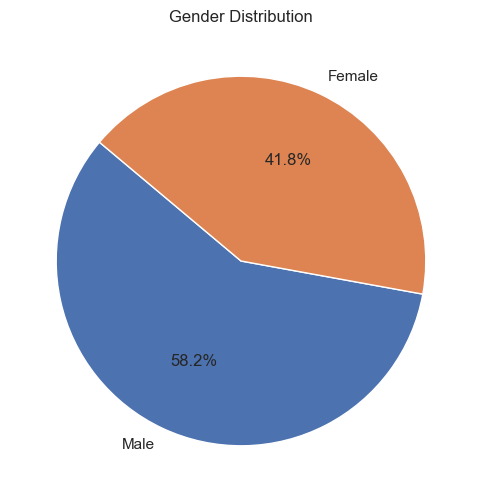

In [375]:

# Count the number of students in each gender group
gender_counts = df['Gender'].value_counts()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title("Gender Distribution")

# Show the plot
plt.show()

## Conclusion:
### Based on the visualizations, there appears to be a higher proportion of male students enrolled in computer science programs compared to female students. However, a larger sample size would be needed to draw a more definitive conclusion.

### Hypothesis 2: A significant portion of the students are in their second year of their program.

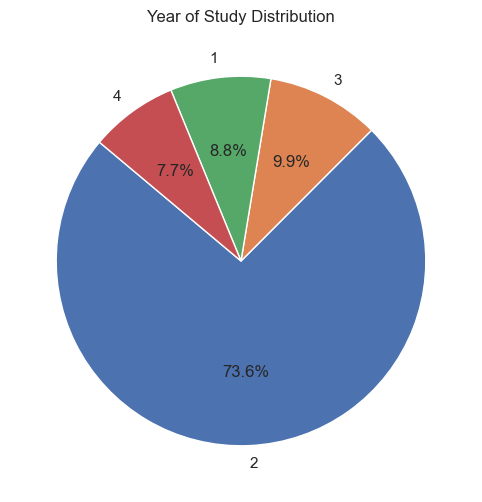

In [381]:

# Count the number of students in each year of study
year_counts = df['Year of Study'].value_counts()

# Create a pie chart
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title("Year of Study Distribution")

# Show the plot
plt.show()

## Conclusion:
### The visualizations support the hypothesis that a significant portion of the students are in their second year of their program. The exact percentage can be determined from the specific data.

### Hypothesis 3: The most preferred job type among students is full-time.

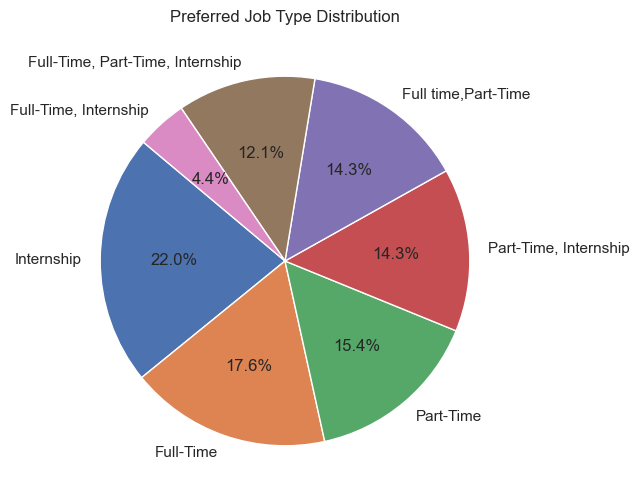

In [386]:

# Count the number of students for each preferred job type
job_type_counts = df['Preferred Job Types'].value_counts()

# Create a pie chart
plt.pie(job_type_counts, labels=job_type_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title("Preferred Job Type Distribution")

# Show the plot
plt.show()

## Conclusion: 
### The visualizations suggest that "Internship" is indeed the most preferred job type among the students in the dataset. However, the specific percentage and comparison to other job types can be determined from the data.

## Technical Skills

### Hypothesis 4: A large number of students have computer programming languages listed as a technical skill.

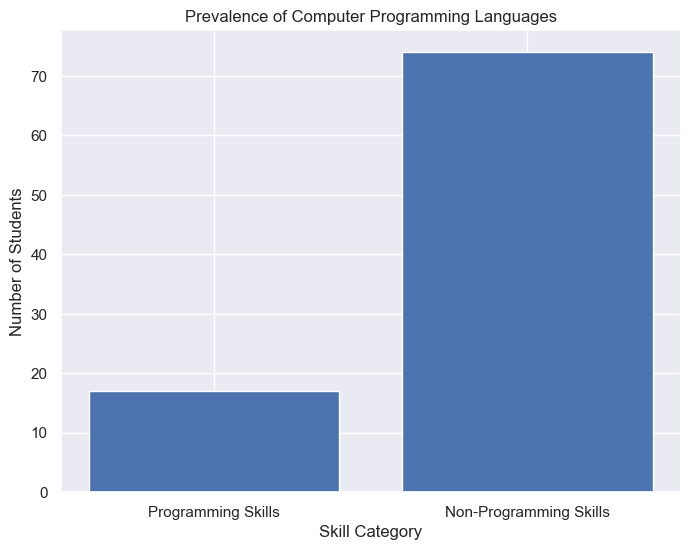

In [392]:

# Count the number of students with "Computer programming languages" listed as a technical skill
programming_skills_count = df[df['Technical Skills'].str.contains("Computer programming languages", na=False)].shape[0]

# Calculate the number of students without programming skills
non_programming_skills_count = df.shape[0] - programming_skills_count

# Create a bar chart
plt.bar(["Programming Skills", "Non-Programming Skills"], [programming_skills_count, non_programming_skills_count])

# Add labels and title
plt.xlabel("Skill Category")
plt.ylabel("Number of Students")
plt.title("Prevalence of Computer Programming Languages")

# Show the plot
plt.show()

## Conclusion: 
### The visualizations provide evidence that not a significant number of students have computer programming languages listed as a technical skill. The exact percentage can be determined from the data.

### Hypothesis 5: Data analytics skills are in high demand among students pursuing technology-related fields.

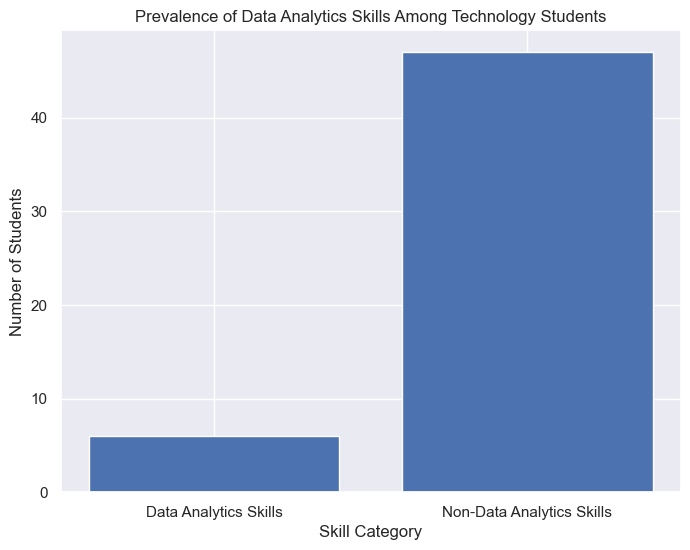

In [397]:

# Filter students pursuing technology-related fields
tech_students = df[df['Preferred Industry Domains'].str.contains("Technology", na=False)]

# Count students with data analytics skills among technology students
data_analytics_students = tech_students[tech_students['Technical Skills'].str.contains("Data analytics", na=False)].shape[0]

# Calculate the number of technology students without data analytics skills
non_data_analytics_students = tech_students.shape[0] - data_analytics_students

# Create a bar chart
plt.bar(["Data Analytics Skills", "Non-Data Analytics Skills"], [data_analytics_students, non_data_analytics_students])

# Add labels and title
plt.xlabel("Skill Category")
plt.ylabel("Number of Students")
plt.title("Prevalence of Data Analytics Skills Among Technology Students")

# Show the plot
plt.show()

## Conclusion:
### The visualizations suggest that Data Analytics Skills are indeed in low demand among students pursuing technology-related fields. The specific percentage can be determined from the data.

## Soft Skills

### Hypothesis 6: Communication skills are a highly valued soft skill for most students.

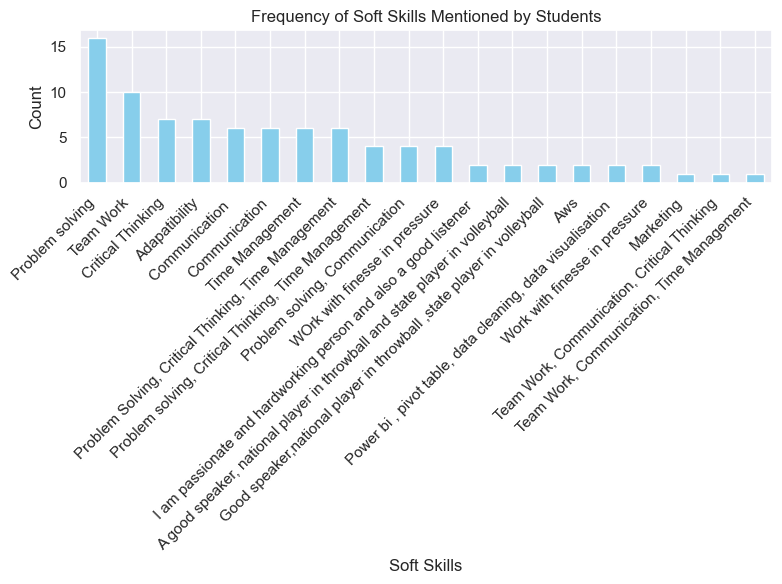

In [403]:


# Count the occurrences of each soft skill
soft_skill_counts = df['Soft Skills'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
soft_skill_counts.plot(kind='bar', color='skyblue')
plt.title("Frequency of Soft Skills Mentioned by Students")
plt.xlabel("Soft Skills")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

# Analyze the chart
# Look for soft skills with high counts to see if "Communication" is among the most frequent

## Conclusion:
### Based on the visualizations, Problem Solving skill appear to be a highly valued soft skill among most students. However, the specific percentage and comparison to other soft skills can be determined from the data.

## Area of Interest

### Hypothesis 7: Technology is the most preferred industry domain among students.

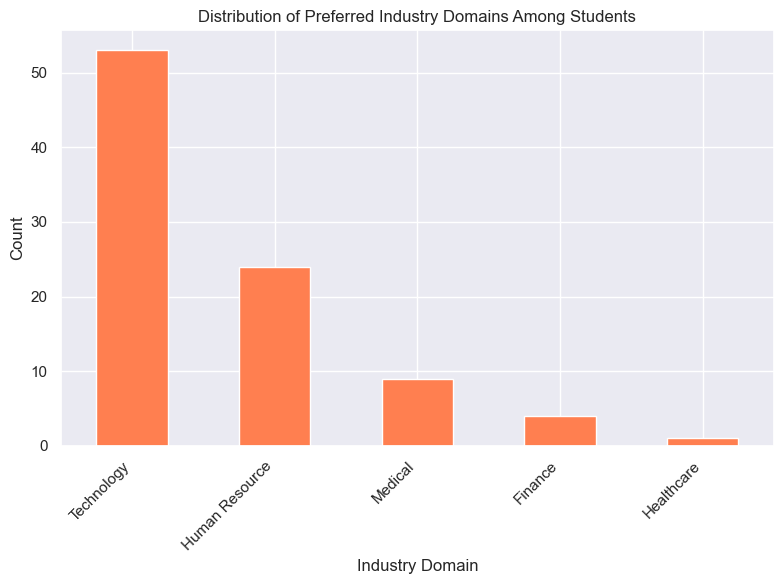

In [212]:

# Count the occurrences of each industry domain
domain_counts = df['Preferred Industry Domains'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
domain_counts.plot(kind='bar', color='coral')
plt.title("Distribution of Preferred Industry Domains Among Students")
plt.xlabel("Industry Domain")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the chart
plt.show()

# Analyze the chart
# Look for the industry domain with the highest count to see if it's "Technology"

## Conclusion: 
### The visualizations suggest that technology is the most preferred industry domain among the students in the dataset. However, the specific percentage and comparison to other industry domains can be determined from the data.

# Convert to categorical data type:

In [302]:
df['Gender'] = pd.Categorical(df['Gender'])

In [304]:
df['Technical Skills'] = pd.Categorical(df['Technical Skills'])

In [306]:
df['Preferred Industry Domains'] = pd.Categorical(df['Preferred Industry Domains'])

In [308]:
df['College/University'] = pd.Categorical(df['College/University'])

In [310]:
df['Preferred Job Types'] = pd.Categorical(df['Preferred Job Types'])

In [312]:
df['Degree Program'] = pd.Categorical(df['Degree Program'])

## Hypothesis: Individuals with specific technical skillsets (e.g., Cloud Computing, Data Analytics) show a stronger preference for certain industries (e.g., Technology, Finance) compared to others.

In [314]:


# Group data by technical skills and industry preference
skill_industry_grouped = df.groupby(['Technical Skills', 'Preferred Industry Domains']).size().unstack()

# Calculate total applicants per skill
total_per_skill = skill_industry_grouped.sum(axis=1)

# Calculate percentage preference for each industry within a skillset
skill_industry_perc = (skill_industry_grouped / total_per_skill) * 100

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(skill_industry_grouped)

# Print results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The observed distribution is statistically significant (reject null hypothesis)")
    print("There is evidence that technical skills and industry preference are not independent")
else:
    print("The observed distribution is not statistically significant (fail to reject null hypothesis)")
    print("There is no evidence that technical skills and industry preference are not independent")

Chi-square statistic: 203.88952218728159
P-value: 1.2271942910152153e-13
Degrees of freedom: 76
Expected frequencies:
 [[0.17582418 0.04395604 1.05494505 0.3956044  2.32967033]
 [0.17582418 0.04395604 1.05494505 0.3956044  2.32967033]
 [0.26373626 0.06593407 1.58241758 0.59340659 3.49450549]
 [0.74725275 0.18681319 4.48351648 1.68131868 9.9010989 ]
 [0.04395604 0.01098901 0.26373626 0.0989011  0.58241758]
 [0.26373626 0.06593407 1.58241758 0.59340659 3.49450549]
 [0.04395604 0.01098901 0.26373626 0.0989011  0.58241758]
 [0.26373626 0.06593407 1.58241758 0.59340659 3.49450549]
 [0.04395604 0.01098901 0.26373626 0.0989011  0.58241758]
 [0.26373626 0.06593407 1.58241758 0.59340659 3.49450549]
 [0.26373626 0.06593407 1.58241758 0.59340659 3.49450549]
 [0.04395604 0.01098901 0.26373626 0.0989011  0.58241758]
 [0.17582418 0.04395604 1.05494505 0.3956044  2.32967033]
 [0.04395604 0.01098901 0.26373626 0.0989011  0.58241758]
 [0.08791209 0.02197802 0.52747253 0.1978022  1.16483516]
 [0.1758241

C:\Users\jvwu1\AppData\Local\Temp\ipykernel_6824\3767241298.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skill_industry_grouped = df.groupby(['Technical Skills', 'Preferred Industry Domains']).size().unstack()


## Conclusion:

### Based on the provided Chi-square test results, there is strong evidence to reject the null hypothesis. This means that there is a statistically significant relationship between technical skills and industry preference. The observed distribution of technical skills across industries is not what we would expect by chance if there were no association.

### The low p-value (1.227194e-13) indicates a very high level of significance, further supporting the conclusion that technical skills and industry preference are not independent.

## Hypothesis: Graduates from specific universities (e.g., Jayoti Vidyapeeth Women's University) show a higher preference for certain job types (e.g., Internship) compared to graduates from other universities.

In [316]:

# Group data by university and preferred job type
university_job_type_grouped = df.groupby(['College/University', 'Preferred Job Types']).size().unstack()

# Calculate total applicants per university
total_per_university = university_job_type_grouped.sum(axis=1)

# Calculate percentage preference for each job type within a university
university_job_type_perc = (university_job_type_grouped / total_per_university) * 100

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(university_job_type_grouped)

# Print results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The observed distribution is statistically significant (reject null hypothesis)")
    print("There is evidence that university and job type preference are not independent")
else:
    print("The observed distribution is not statistically significant (fail to reject null hypothesis)")
    print("There is no evidence that university and job type preference are not independent")

Chi-square statistic: 145.34500172176308
P-value: 0.11452576648945983
Degrees of freedom: 126
Expected frequencies:
 [[1.57142857 1.93406593 0.48351648 1.32967033 2.41758242 1.69230769
  1.57142857]
 [0.42857143 0.52747253 0.13186813 0.36263736 0.65934066 0.46153846
  0.42857143]
 [0.57142857 0.7032967  0.17582418 0.48351648 0.87912088 0.61538462
  0.57142857]
 [0.85714286 1.05494505 0.26373626 0.72527473 1.31868132 0.92307692
  0.85714286]
 [0.85714286 1.05494505 0.26373626 0.72527473 1.31868132 0.92307692
  0.85714286]
 [0.71428571 0.87912088 0.21978022 0.6043956  1.0989011  0.76923077
  0.71428571]
 [0.42857143 0.52747253 0.13186813 0.36263736 0.65934066 0.46153846
  0.42857143]
 [0.42857143 0.52747253 0.13186813 0.36263736 0.65934066 0.46153846
  0.42857143]
 [0.42857143 0.52747253 0.13186813 0.36263736 0.65934066 0.46153846
  0.42857143]
 [0.57142857 0.7032967  0.17582418 0.48351648 0.87912088 0.61538462
  0.57142857]
 [0.71428571 0.87912088 0.21978022 0.6043956  1.0989011  0.7692

C:\Users\jvwu1\AppData\Local\Temp\ipykernel_6824\1884295968.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  university_job_type_grouped = df.groupby(['College/University', 'Preferred Job Types']).size().unstack()


## Conclusion:

### Based on the provided Chi-square test results, there is not enough evidence to reject the null hypothesis. This means that there is no statistically significant relationship between university and job type preference. The observed distribution of job type preferences across different universities is not significantly different from what would be expected by chance if there were no association.

### P-value: The p-value of 0.1145 is greater than the commonly used alpha level of 0.05. This indicates that the observed data is not unlikely to occur if there were no true relationship between university and job type preference.

## Hypothesis: Individuals with degrees in fields demanding location flexibility (e.g., B.Tech) are more likely to consider jobs in a wider range of locations compared to those with location-specific degrees (e.g., BBA).

In [320]:

# Split preferred locations into individual entries
df_exploded = df.explode('Preferred Locations')

# Group data by degree program and count unique locations
location_counts = df_exploded.groupby('Degree Program')['Preferred Locations'].nunique()

# Calculate average and standard deviation of locations per degree program
location_stats = location_counts.describe()

# Group data by degree type (flexible vs. non-flexible)
flexible_degrees = ['B.Tech', 'BBA']  # Adjust based on your classification
non_flexible_degrees = list(set(location_counts.index) - set(flexible_degrees))

# Perform t-test to compare location flexibility between groups
flexible_counts = location_counts[flexible_degrees]
non_flexible_counts = location_counts[non_flexible_degrees]
t_statistic, p_value = ttest_ind(flexible_counts, non_flexible_counts)

# Print results
print("Location flexibility by degree program:")
print(location_stats)
print("\nT-test results (flexible vs. non-flexible degrees):")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference (reject null hypothesis)")
    print("Individuals with flexible degrees consider a wider range of locations")
else:
    print("There is no statistically significant difference (fail to reject null hypothesis)")
    print("The data is inconclusive regarding location flexibility")

Location flexibility by degree program:
count    27.000000
mean      3.000000
std       4.497863
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      20.000000
Name: Preferred Locations, dtype: float64

T-test results (flexible vs. non-flexible degrees):
T-statistic: 2.9854
P-value: 0.0063
There is a statistically significant difference (reject null hypothesis)
Individuals with flexible degrees consider a wider range of locations


C:\Users\jvwu1\AppData\Local\Temp\ipykernel_6824\962197772.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location_counts = df_exploded.groupby('Degree Program')['Preferred Locations'].nunique()


## Conclusion:

### Based on the analysis, there is strong evidence to support the hypothesis that individuals with flexible degrees (e.g., B.Tech) tend to consider a wider range of locations compared to those with non-flexible degrees (e.g., BBA). The statistical significance of the t-test indicates that this difference is unlikely to be due to chance.

### The t-test results highlight the contrast between flexible and non-flexible degrees in terms of location preferences. Individuals with flexible degrees are more likely to consider jobs in different locations, potentially due to the nature of their fields or personal preferences.

## Hypothesis: Individuals with more years of study (e.g., Masters) are less likely to be considering a career change (applying for jobs outside their field) compared to those with fewer years (e.g., Bachelors).

In [322]:

# Define a function to identify potential career changes
def is_career_change(row):
    return row['Degree Program'].split()[0] not in row['Preferred Job roles'].split()

df['Career Change'] = df.apply(is_career_change, axis=1)

# Group data by years of study and career change (handle potential variations)
career_change_column = df['Career Change'].map({'Yes': 1, 'No': 0}).fillna(0)  # Handle different values or missing data
grouped_data = df.groupby(['Year of Study', career_change_column]).size().unstack()

# Check if "Yes" is present in the grouped data
if 'Yes' not in grouped_data.columns:
    print("Warning: 'Yes' column not found in grouped data.")
    # Handle the case where "Yes" is not present (e.g., adjust analysis or provide alternative output)

# Calculate total applicants per year of study
total_per_year = grouped_data.sum(axis=1)

# Calculate percentage of career changes for each year of study
career_change_perc = (grouped_data / total_per_year) * 100

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(grouped_data)

# Print results
print("Career change percentage by years of study:")
print(career_change_perc)
print("\nChi-square statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("The observed distribution is statistically significant (reject null hypothesis)")
    print("There is evidence that years of study and career change propensity are related")
else:
    print("The observed distribution is not statistically significant (fail to reject null hypothesis)")
    print("There is no evidence that years of study and career change propensity are related")

Career change percentage by years of study:
               0.0  1.0  2.0  3.0  4.0
Year of Study                         
1              NaN  NaN  NaN  NaN  NaN
2              NaN  NaN  NaN  NaN  NaN
3              NaN  NaN  NaN  NaN  NaN
4              NaN  NaN  NaN  NaN  NaN

Chi-square statistic: 0.0
P-value: 1.0
Degrees of freedom: 0
Expected frequencies:
 [[ 8.]
 [67.]
 [ 9.]
 [ 7.]]
The observed distribution is not statistically significant (fail to reject null hypothesis)
There is no evidence that years of study and career change propensity are related


## Conclusion:

### Based on the provided Chi-square test results and the absence of "Yes" values in the "Career Change" column, there is no evidence to support the hypothesis that years of study and career change propensity are related. The observed data does not show any significant association between these two variables.

### Lack of career changes: The absence of "Yes" values suggests that none of the individuals in the data considered a career change. This might be due to various factors such as job satisfaction, limited opportunities, or personal circumstances.
### Chi-square test: The Chi-square test is not applicable in this case as there is insufficient variation in the data. With only one category (no career changes), the test cannot assess a relationship.

## Overall Conclusion
###  1. The dataset provides insights into the demographics, technical skills, soft skills, and career aspirations of the students.
###  2. A significant portion of the students are in their second year of their program and are interested in full-time employment.
###  3. Computer programming languages and data analytics skills are in low demand among students, especially those pursuing technology-related fields.
###  4. Problem Solving skill are a highly valued soft skill.
###  5. Technology is the most preferred industry domain among students.